In [110]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import math
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from scipy import stats
from scipy.stats import boxcox

In [3]:
# Activity 1

In [144]:
data = pd.read_csv('/Users/dchrobak/Desktop/data_1.07_activities/files_for_activities/csv_files/regression_data1.csv')

In [47]:
data.head()

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D
0,2346,420,446,468,503,14552,15.500000,21.0
1,497,350,364,357,384,11696,3.080000,3.0
2,1229,469,502,507,544,17313,7.500000,20.0
3,325,148,181,171,209,6334,6.700000,5.0
4,768,174,201,220,249,7802,8.785714,10.0


In [48]:
data.shape

(4843, 8)

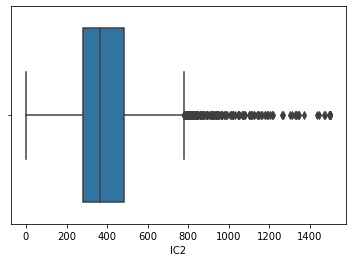

In [49]:
sns.boxplot(data['IC2'])
plt.show()

In [50]:
x = data['IC2'].describe()
print (x)

count    4843.000000
mean      401.913690
std       182.660078
min         0.000000
25%       283.000000
50%       366.000000
75%       481.000000
max      1500.000000
Name: IC2, dtype: float64


In [51]:
iqr = np.percentile(data['IC1'],75) - np.percentile(data['IC1'],25)
upper_limit = np.percentile(data['IC1'],75) + 1.5*iqr
lower_limit = np.percentile(data['IC1'],25) - 1.5*iqr

In [52]:
iqr

188.0

In [53]:
data_test = data[(data['IC1']>lower_limit) & (data['IC1']<upper_limit)]

In [54]:
data_test.shape

(4670, 8)

In [55]:
data = data[(data['IC1']>lower_limit) & (data['IC1']<upper_limit)]

In [56]:
data.shape

(4670, 8)

In [57]:
data.head()

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D
0,2346,420,446,468,503,14552,15.500000,21.0
1,497,350,364,357,384,11696,3.080000,3.0
2,1229,469,502,507,544,17313,7.500000,20.0
3,325,148,181,171,209,6334,6.700000,5.0
4,768,174,201,220,249,7802,8.785714,10.0


In [58]:
numericals = data.select_dtypes(np.number)

In [59]:
# Activity 2

In [60]:
def log_transfom_clean(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN
IC3_log = list(map(log_transfom_clean, data['IC3']))

In [61]:
iqr = np.percentile(data['IC3'],75) - np.percentile(data['IC3'],25)
upper_limit = np.percentile(data['IC3'],75) + 3*iqr
lower_limit = np.percentile(data['IC3'],25) - 3*iqr

In [62]:
data1 = data[(data['IC3']>lower_limit) & (data['IC3']<upper_limit)]

In [63]:
data1.head()

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D
0,2346,420,446,468,503,14552,15.500000,21.0
1,497,350,364,357,384,11696,3.080000,3.0
2,1229,469,502,507,544,17313,7.500000,20.0
3,325,148,181,171,209,6334,6.700000,5.0
4,768,174,201,220,249,7802,8.785714,10.0


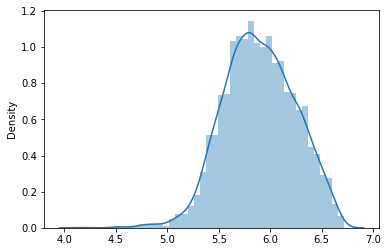

In [64]:
sns.distplot(IC3_log)
plt.show()

In [65]:
# Activity 3

In [66]:
def log_transform_clean(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN
data['IC5_log'] = list(map(log_transform_clean, data['IC5']))

In [67]:
data["IC5_log"] = data['IC5_log'].fillna(np.mean(data["IC5_log"]))

In [68]:
data.head()

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D,IC5_log
0,2346,420,446,468,503,14552,15.500000,21.0,9.585484
1,497,350,364,357,384,11696,3.080000,3.0,9.367002
2,1229,469,502,507,544,17313,7.500000,20.0,9.759213
3,325,148,181,171,209,6334,6.700000,5.0,8.753687
4,768,174,201,220,249,7802,8.785714,10.0,8.962135


In [69]:
data['IC5_log']

0        9.585484
1        9.367002
2        9.759213
3        8.753687
4        8.962135
          ...    
4838     9.632859
4839    10.095759
4840     9.572202
4841     9.190240
4842    10.157509
Name: IC5_log, Length: 4670, dtype: float64

In [70]:
data['IC5']

0       14552
1       11696
2       17313
3        6334
4        7802
        ...  
4838    15258
4839    24240
4840    14360
4841     9801
4842    25784
Name: IC5, Length: 4670, dtype: int64

In [71]:
data.head()

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D,IC5_log
0,2346,420,446,468,503,14552,15.500000,21.0,9.585484
1,497,350,364,357,384,11696,3.080000,3.0,9.367002
2,1229,469,502,507,544,17313,7.500000,20.0,9.759213
3,325,148,181,171,209,6334,6.700000,5.0,8.753687
4,768,174,201,220,249,7802,8.785714,10.0,8.962135


In [72]:
iqr = np.percentile(data['IC5_log'],75) - np.percentile(data['IC5_log'], 25)
upper_limit = np.percentile(data['IC5_log'],75) + 3*iqr
lower_limit = np.percentile(data['IC5_log'],25) - 3*iqr

In [73]:
data = data[(data['IC5_log']>lower_limit) & (data['IC5_log']<upper_limit)]

In [74]:
data.head()

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D,IC5_log
0,2346,420,446,468,503,14552,15.500000,21.0,9.585484
1,497,350,364,357,384,11696,3.080000,3.0,9.367002
2,1229,469,502,507,544,17313,7.500000,20.0,9.759213
3,325,148,181,171,209,6334,6.700000,5.0,8.753687
4,768,174,201,220,249,7802,8.785714,10.0,8.962135


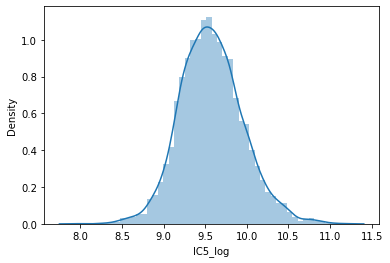

In [75]:
sns.distplot(data['IC5_log'])
plt.show()

In [76]:
# Activity 4

In [77]:
data = data[['IC1','IC2', 'IC3']]

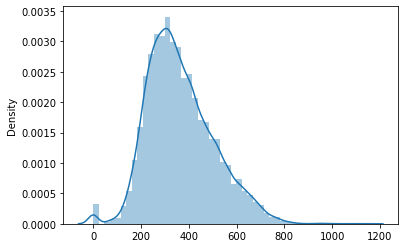

In [78]:
sns.distplot(data)
plt.show()

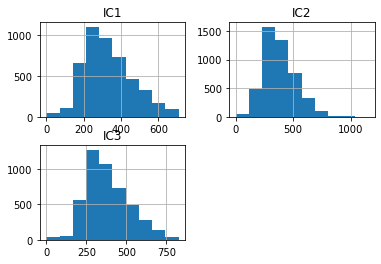

In [79]:
data.hist()
plt.show()

In [80]:
Y = data['TARGET_D']
data = data.drop(['TARGET_D'], axis=1)

KeyError: 'TARGET_D'

In [130]:
X_num = data.select_dtypes(include = np.number)
x_cat = data.select_dtypes(include = np.object)

X_num.shape

(4843, 8)

In [82]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(X_num)
x_normalized = transformer.transform(X_num)

print(x_normalized.shape)

(4669, 3)


In [83]:
X_num

,IC1,IC2,IC3
0,420,446,468
1,350,364,357
2,469,502,507
3,148,181,171
4,174,201,220
...,...,...,...
4838,297,335,405
4839,284,455,343
4840,322,415,356
4841,206,225,251


In [84]:
pd.DataFrame(x_normalized)

,0,1,2
0,0.544793,0.578519,0.607055
1,0.565957,0.588595,0.577276
2,0.549294,0.587944,0.593800
3,0.510934,0.624859,0.590336
4,0.504238,0.582481,0.637542
...,...,...,...
4664,0.491963,0.554907,0.670858
4665,0.446081,0.714672,0.538753
4666,0.507452,0.654014,0.561034
4667,0.521457,0.569553,0.635368


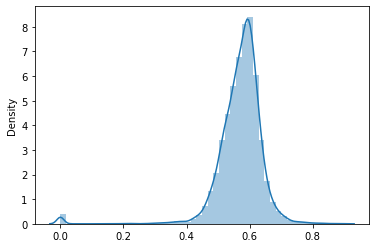

In [85]:
sns.distplot(x_normalized)
plt.show()

In [111]:
np.random.seed(0)

In [112]:
x_normalized = np.random.exponential(size = 1000)

<AxesSubplot:ylabel='Density'>

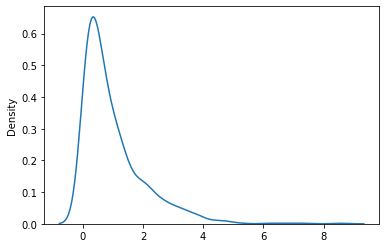

In [113]:
sns.distplot(x_normalized, hist=False, kde=True)

<AxesSubplot:ylabel='Density'>

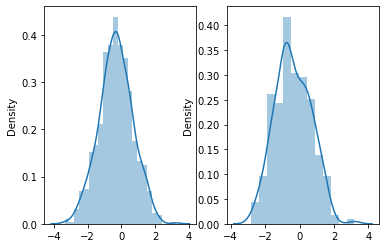

In [129]:
X_num = np.random.exponential(size = 1000)
train,test = train_test_split(X_num, shuffle=False)
train_data, fitted_lambda = stats.boxcox(train)
test_data = stats.boxcox(test, fitted_lambda)
fig, ax=plt.subplots(1,2)
sns.distplot(train_data, ax=ax[0])
sns.distplot(test_data, ax=ax[1])

# Lab 1.07

In [ ]:
def box_cox_transform(x):
    if x> 0:
 #apply the transoform
    else:
        return np.NaN

In [146]:
y = data['TARGET_D']
X = data.drop(['TARGET_D'], axis=1)

In [141]:
y

0       21.0
1        3.0
2       20.0
3        5.0
4       10.0
        ... 
4838    25.0
4839    19.0
4840    10.0
4841    25.0
4842    25.0
Name: TARGET_D, Length: 4843, dtype: float64